 <img src='bit_hd.jpg'/>

## <span style='color:blue'>Definition</span>:  Time series analysis for the Portland public transportation system.
               

## <span style='color:blue'>Prepared By</span>:  PRAKASH TADVI

# Importing Libraries.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data.

It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

# Reading Data Using Pandas.

In [13]:
data=pd.read_csv('international-airline-passengers.csv')
data.columns=["month","avg_month_riders"]

# First Five Rows.

In [14]:
data.head()

,month,avg_month_riders
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135


In [15]:
data.tail()

,month,avg_month_riders
138,1960-08,606
139,1960-09,508
140,1960-10,461
141,1960-11,390
142,1960-12,432


# Data Cleaning.

In [16]:
data.drop(105,axis=0,inplace=True)

In [17]:
data.tail()

,month,avg_month_riders
138,1960-08,606
139,1960-09,508
140,1960-10,461
141,1960-11,390
142,1960-12,432


In [18]:
data.columns=['Month','Sales per month' ]

In [19]:
data.head()

,Month,Sales per month
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135


In [20]:
data.tail()

,Month,Sales per month
138,1960-08,606
139,1960-09,508
140,1960-10,461
141,1960-11,390
142,1960-12,432


In [21]:
data.head()

,Month,Sales per month
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 142
Data columns (total 2 columns):
Month              142 non-null object
Sales per month    142 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


# Converting Datatypes.

In [23]:
data['Month']=data['Month'].astype(np.int32)

ValueError: invalid literal for int() with base 10: '1949-02'

In [24]:
data['Month']=pd.to_datetime(data['Month'],format='%Y-%m')

In [28]:
data=data.iloc[:104,:]

,Month,Sales per month
0,1949-02-01,118
1,1949-03-01,132
2,1949-04-01,129
3,1949-05-01,121
4,1949-06-01,135
5,1949-07-01,148
6,1949-08-01,148
7,1949-09-01,136
8,1949-10-01,119
9,1949-11-01,104


In [26]:
data.head()

,Month,Sales per month
0,1949-02-01,118
1,1949-03-01,132
2,1949-04-01,129
3,1949-05-01,121
4,1949-06-01,135


# Data Exploration.

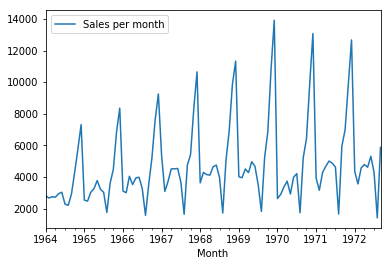

In [32]:
data.plot.line(x='Month',y='Sales per month')
plt.show()

In [34]:
data_df=data
mon=data['Month']
temp=pd.DatetimeIndex(mon)
month=pd.Series(temp.month)
data_df=data_df.drop('Month',axis=1)
data_df=data_df.join(month)
data_df.head()

,Sales per month,Month
0,2815,1
1,2672,2
2,2755,3
3,2721,4
4,2946,5


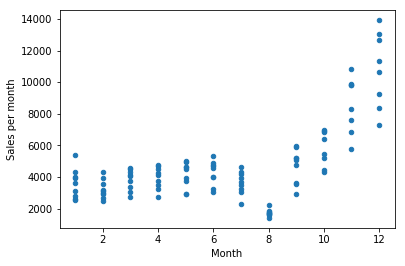

In [35]:
data_df.plot.scatter(x='Month',y='Sales per month')
plt.show()

In [36]:
riders=data[['Sales per month']]

# Trend Analysis.

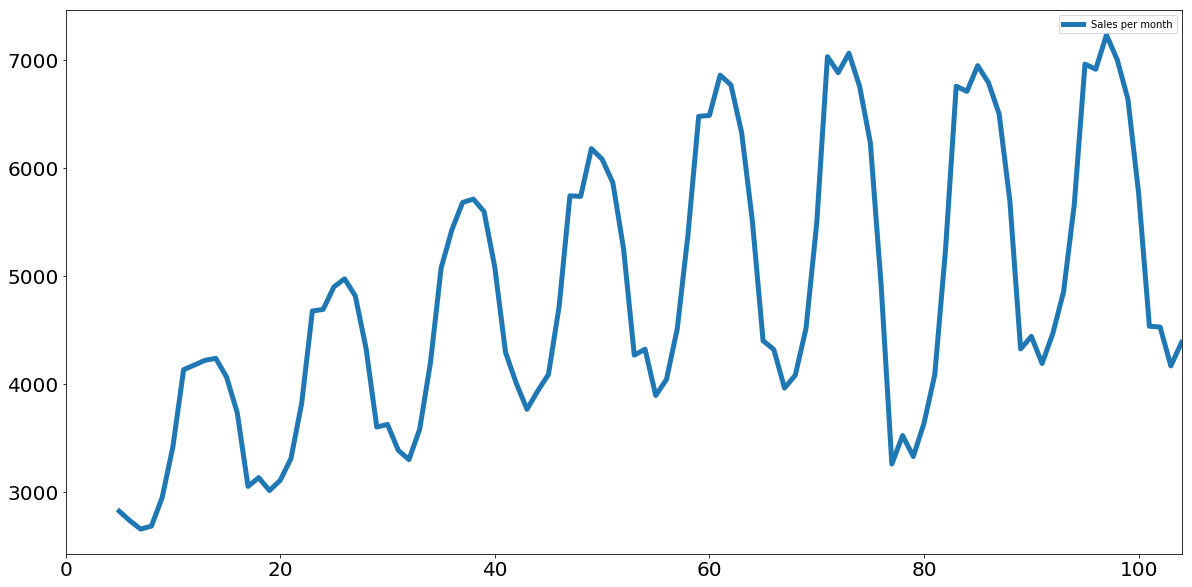

In [37]:
riders.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

# Seasonability Analysis.

# Using 1st Discrete difference of object.

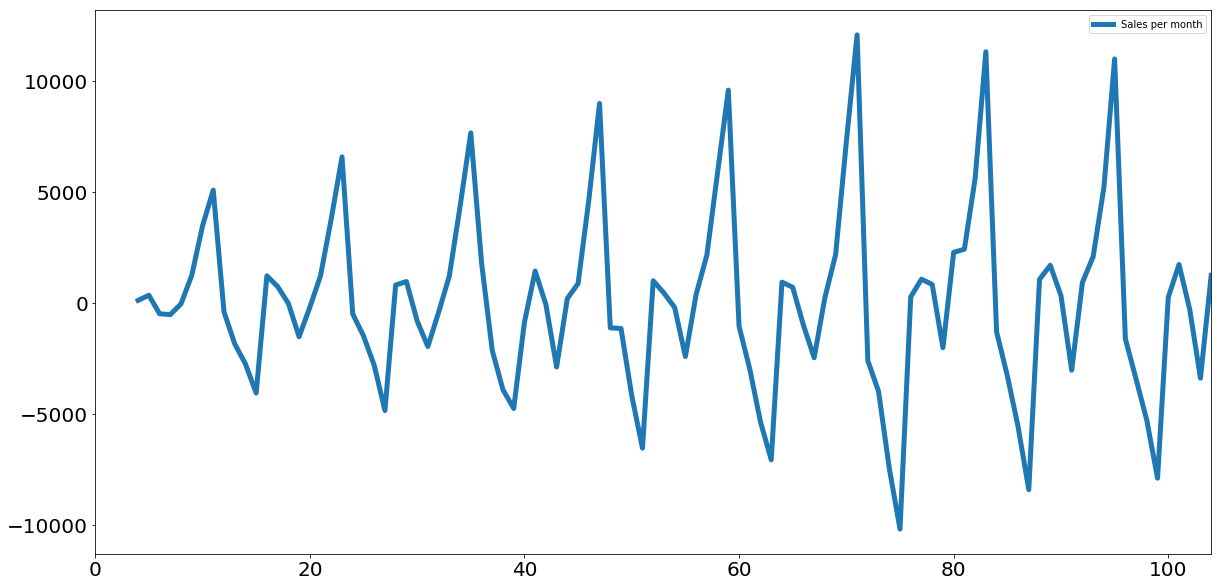

In [38]:
riders.diff(periods=4).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

# Periodicity and Auto Co-relation.

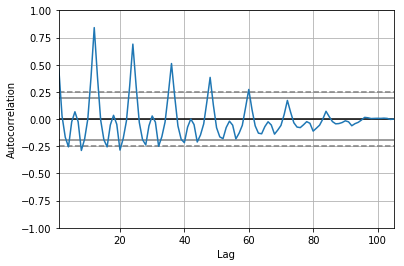

In [39]:
pd.plotting.autocorrelation_plot(data['Sales per month'])
plt.show()

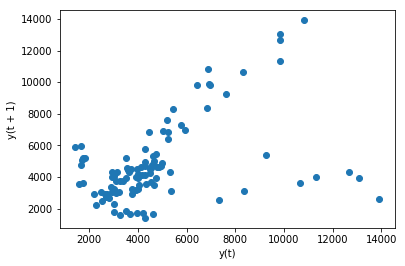

In [40]:
pd.plotting.lag_plot(data['Sales per month'])
plt.show()

In [41]:
data=data.set_index('Month')

# Arima Prediction.

In [42]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Sales per month'],order=(0,1,0))
results=model.fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D.Sales per month   No. Observations:                  104
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -966.866
Method:                           css   S.D. of innovations           2638.192
Date:                Tue, 25 Feb 2020   AIC                           1937.732
Time:                        21:38:43   BIC                           1943.021
Sample:                    02-01-1964   HQIC                          1939.874
                         - 09-01-1972                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4423    258.696      0.114      0.910    -477.593     536.477
